In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# create class Value with the following atrribute

class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
        
    def __repr__(self):
        return f"Value(data ={self.data})"
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data,(self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self * other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data,(self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')
        def _backward():
            self.grad += other * ((self.data)**(other-1)) * out.grad
        out._backward = _backward
        return out
     
    def __neg__(self): # -self
        return self * (-1)
    
    def __sub__(self,  other):
        return self +(-other)
        
    def __truediv__(self, other):
        return self * other**-1
    
    def __rmul__(self, other):# other * self
        return self * other
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self, ), 'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        self.grad = 1.0
        build_topo(self)
        for node in reversed(topo):
            node._backward()  
# create help fucurion for plot the  Graph 
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child) # recursivity
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f| grad %.4f }" % (n.label, n.data, n.grad), shape='record', color='red')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op, color='green')
          # and connect this node to it
          dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


# create neural network class using Value class 
import random
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    def __call__(self, x):
        # w * x  + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]
    
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
            
        return params
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1])for i in range(len(nouts))]
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
       
        return x
    def parameters(self):
        return [p  for layer in self.layers for p in layer.parameters()]


           



In [2]:
def f(x):
    return 3*x**2  -4*x + 5

In [3]:
f(3.0)

20.0

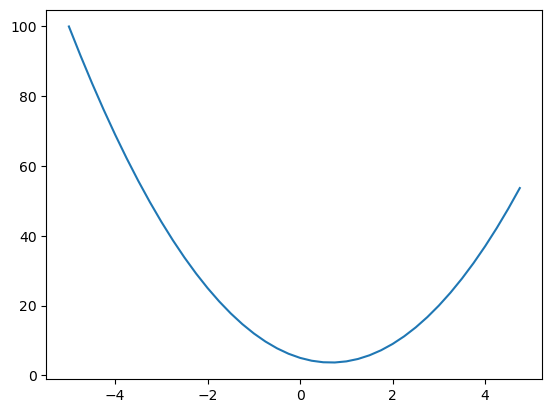

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [38]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
        
    def __repr__(self):
        return f"Value(data ={self.data})"
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data,(self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self * other
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data,(self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')
        def _backward():
            self.grad += other * ((self.data)**(other-1)) * out.grad
        out._backward = _backward
        return out
     
    def __neg__(self): # -self
        return self * (-1)
    
    def __sub__(self,  other):
        return self +(-other)
        
    def __truediv__(self, other):
        return self * other**-1
    
    def __rmul__(self, other):# other * self
        return self * other
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    def sigmoid(self):
        x = self.data
        t = (1)/(math.exp(-x)+1)
        out = Value(t, (self,), 'sigmoid')
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    # relu function 
    def relu(self):
        x = self.data
        t = max(0, x)
        out = Value(t, (self,), 'relu')
        def _backward():
            if x >0:
                self.grad += 1.0 * out.grad
            else:
                self.grad += 0.0
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self, ), 'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        self.grad = 1.0
        build_topo(self)
        for node in reversed(topo):
            node._backward()  

    

    

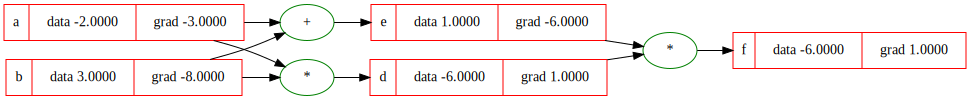

In [36]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b ; d.label = 'd'
e = a + b ; e.label = 'e'
f = d * e ; f.label = 'f'
f.backward()
draw_dot(f)

In [37]:
a/b

Value(data =-0.6666666666666666)

In [ ]:
1 / 1+ exp(-x)

    


In [16]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child) # recursivity
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f| grad %.4f }" % (n.label, n.data, n.grad), shape='record', color='red')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op, color='green')
          # and connect this node to it
          dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [11]:
a.grad = -4.00
b.grad = -66.00

DL/dc = dL/dd * dd/dc = f*e
dd/dc =e
# have this 
* f(x+h)-f(x)/h
* d = c + e
* (d+h) -d = (c+e+h-c -e)/h = 1.0

* dL/de = -2.0
-dL/da
* DL/da = (dL/de)* de/da = (-2.0) * (2.0) = -4.0
-dL/db
* DL/da = (dL/de)* de/da = (-2.0) * (33.0) = -66.0

* de/da ? = b = 2




In [12]:
def lol():
    h = 0.00001
    a = Value(33, label = "a")
    b = Value(2, label = "b")
    c = Value(11, label = "c")
    e= a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    
    f = Value(-2.0,label ='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    a = Value(33+h , label = "a")
    
    b = Value(2, label = "b")
    c = Value(11, label = "c")
    e= a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0,label ='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    print((L2 - L1)/h)

In [13]:
b.grad = -66.00
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f
print(L.data)

-110.33279999999999


In [14]:
d.grad = -2.0
f.grad = 77.0

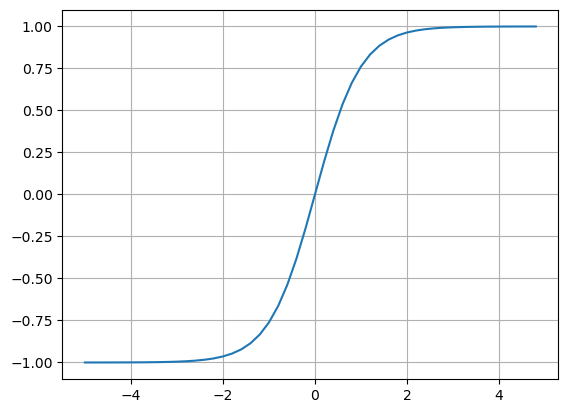

In [15]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

## Neural Networks (NN)

## Tanh Functions

In [91]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
#weights w1 & w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.7, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w + x2*w2"
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()



## Relu function 
* f(x) = max(0, x)


In [17]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
#weights w1 & w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.7, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w + x2*w2"
n = x1w1x2w2 + b; n.label = 'n'
o = n.relu(); o.label = 'o'
#e = (2 * n).exp()
#o = (e - 1) / (e + 1)
#o.label = 'o'

o.backward()


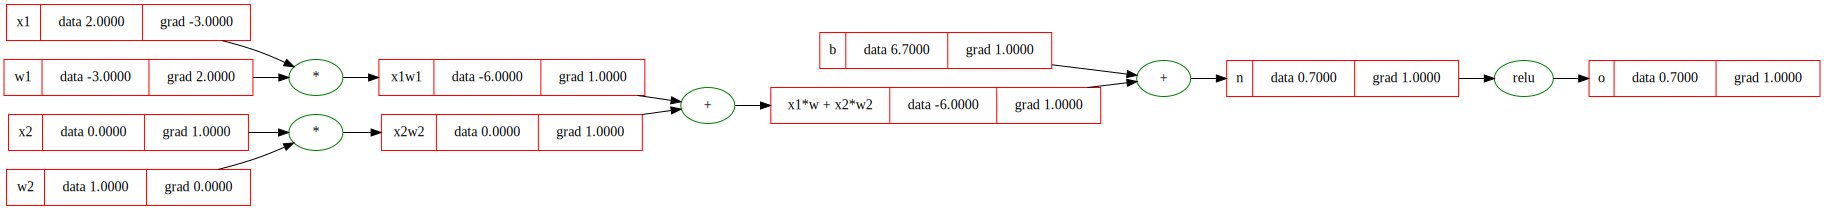

In [18]:
draw_dot(o)

In [ ]:
def relu(self):
        x = self.data
        t = max(0, x)
        out = Value(t, (self,), 'tanh')
        def _backward():
            if x >0:
                self.grad += 1.0 * out.grad
            else:
                self.grad + = 0.0
        out._backward = _backward
        return out

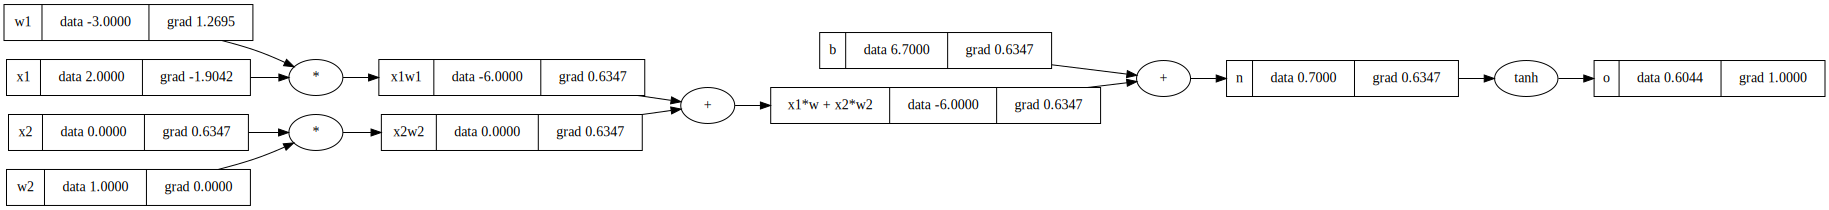

In [92]:
draw_dot(o)

### Function 

In [93]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
#weights w1 & w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.7, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w + x2*w2"
n = x1w1x2w2 + b; n.label = 'n'
#o = n.tanh(); o.label = 'o'
e = (2 * n).exp()
o = (e - 1) / (e + 1)

o.label = 'o'
o.backward()



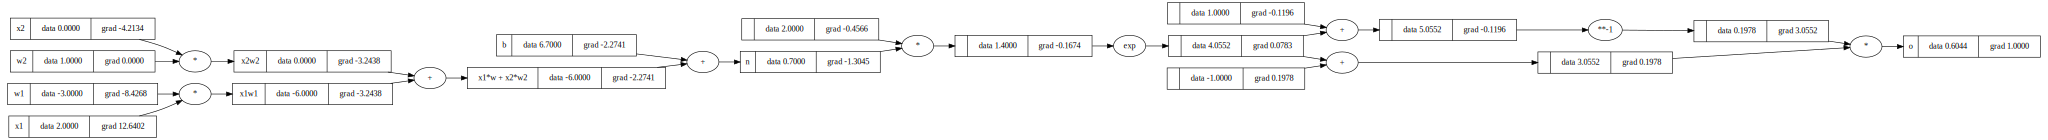

In [94]:
draw_dot(o)

## calculs

In [24]:
o.grad=1.0

In [26]:
n.grad = 0.5

In [28]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [30]:
x1w1.grad = 0.5
x2w2.grad = 0.5

* x2.grad = w2.data * x2w2.grad
* w2.grad = x2.data * x2w2.grad

* x1.grad = w1.data * x1w1.grad
* w1.grad = x1.data * x1w1.grad

## Backward Function 

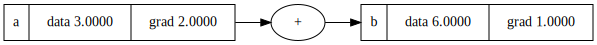

In [67]:
a = Value(3.0, label = 'a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

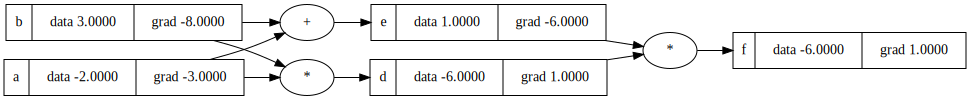

In [68]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b ; d.label = 'd'
e = a + b ; e.label = 'e'
f = d * e ; f.label = 'f'
f.backward()
draw_dot(f)

## Using Pytorch

In [105]:
import torch
x1 = torch.Tensor([2.0]).double()   ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()   ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()  ; w1.requires_grad =True
w2 = torch.Tensor([1.0]).double()   ; w2.requires_grad =True
b = torch.Tensor([6.831373434]).double(); b.requires_grad = True
n = x1 * w1 + x2 * w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()
print('_____')
print('x1', x1.grad.item())
print('x2', x2.grad.item())
print('w1', w1.grad.item())
print('w2', w2.grad.item())

0.6812126682308415
_____
x1 -1.6078479019254523
x2 0.5359493006418174
w1 1.071898601283635
w2 0.0


In [106]:
o

tensor([0.6812], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [107]:
o.item()

0.6812126682308415

In [210]:
import random
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    def __call__(self, x):
        # w * x  + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
            
        return params
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1])for i in range(len(nouts))]
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
       
        return x
    def parameters(self):
        return [p  for layer in self.layers for p in layer.parameters()]

In [32]:
import random
class Neuronn:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    def __call__(self, x):
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        return act
    def parametrs(self):
        return self.w + self.b
    
class Layer:
    def __init__(self, nin, nout):
        self.neuronns = [neuronn(nin) for _ in range(nout)]
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parametrs]
        
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layers(sz[i], sz[i+1]) for p in range(len(nouts))]
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [33]:
m = Neuronn(3)
x = [1.0, 2.0, 3.0]

m(x)

Value(data =-3.423409835662791)

In [211]:
x = [2.0, 3.0, -1.0]
n = MLP(3,[4, 4,1])
n(x)

Value(data =0.1597953865169306)

In [212]:
n.parameters()

[Value(data =-0.2836008420628129),
 Value(data =0.19695746492246147),
 Value(data =-0.35351985674160247),
 Value(data =0.09983636235307758),
 Value(data =-0.890830655771333),
 Value(data =0.9483765363114818),
 Value(data =-0.43043292172096037),
 Value(data =0.377008269990214),
 Value(data =-0.6700599139549641),
 Value(data =0.30101841568624477),
 Value(data =-0.37683533385192014),
 Value(data =-0.10012992147097188),
 Value(data =-0.09957261969667663),
 Value(data =-0.9296565364213787),
 Value(data =0.5693399846974334),
 Value(data =-0.710371677237772),
 Value(data =0.8273059205949871),
 Value(data =0.16026863325359098),
 Value(data =0.9454691547567471),
 Value(data =-0.3092581352525061),
 Value(data =-0.4263689601058447),
 Value(data =0.7547093469570973),
 Value(data =-0.19050777748526393),
 Value(data =0.5910661655942855),
 Value(data =-0.20790513860211757),
 Value(data =0.8033690240458644),
 Value(data =0.025267263994866784),
 Value(data =-0.3985455425926969),
 Value(data =-0.3888865

In [213]:
xs = [
    [2.0,3.0, -1.0],
    [3.0,-1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0,1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] #desired targets

ypred = [n(x) for x in xs]
ypred

[Value(data =0.1597953865169306),
 Value(data =0.7610398826763266),
 Value(data =0.6668929500661139),
 Value(data =0.11100460499223956)]

In [220]:
for k in range(20):
    # forward pass 
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout  in zip(ys, ypred)])
    # backward pass
    for p in n.parameters():
        p.grad = 0.0 # zero grad in pytorch
    loss.backward()
    # update
    
    for p in n.parameters():
        p.data += -0.05 * p.grad
    print((k, loss.data))
    

(0, 0.13760247102221376)
(1, 0.1283924485973755)
(2, 0.12021940447916857)
(3, 0.11288897091758515)
(4, 0.10636229864925109)
(5, 0.10050046285271408)
(6, 0.09518589949359973)
(7, 0.09037183593588141)
(8, 0.08594973896531086)
(9, 0.08190729691597345)
(10, 0.07820082945148331)
(11, 0.07475486900793027)
(12, 0.07161405373259369)
(13, 0.06872191871987826)
(14, 0.0660381542611929)
(15, 0.06354708034784554)
(16, 0.06120986562731229)
(17, 0.059027704647576465)
(18, 0.056994786455417286)
(19, 0.05508954389365626)


In [221]:
ypred


[Value(data =0.8295693327433279),
 Value(data =-0.8343212261463864),
 Value(data =-0.9953804801447949),
 Value(data =0.8338111079995815)]

In [219]:
loss = sum([(yout - ygt)**2 for ygt, yout  in zip(ys, ypred)])

In [191]:
loss.backward()

In [192]:
n.layers[0].neurons[1].w[0]

Value(data =-0.6276049290157037)

In [199]:
for p in n.parameters():
    p.data += -0.01 * p.grad
    

In [201]:
n.layers[0].neurons[0].w[0].data

0.9048116972615179

In [203]:
n.parameters()

[Value(data =0.9048116972615179),
 Value(data =1.8227060564819624),
 Value(data =2.880684417369329),
 Value(data =2.390163131787292),
 Value(data =-1.5236334844183985),
 Value(data =2.5547257447708085),
 Value(data =-1.5008124796245519),
 Value(data =1.1761162652850998),
 Value(data =-11.295664430258128),
 Value(data =-7.173924348443279),
 Value(data =-3.721383243570141),
 Value(data =-8.52153497883763),
 Value(data =5.511258430871709),
 Value(data =1.3433201291762094),
 Value(data =-5.611032840988099),
 Value(data =0.13289197013195864),
 Value(data =-0.22639942335948182),
 Value(data =0.9872642141005814),
 Value(data =-0.3928255381958587),
 Value(data =0.022952349663703298),
 Value(data =-0.7031063720194298),
 Value(data =0.4596321531703747),
 Value(data =0.6357697779796582),
 Value(data =0.6634112968444978),
 Value(data =0.7332796698507792),
 Value(data =0.4307311628565476),
 Value(data =-0.8735678391011419),
 Value(data =0.3429446803432996),
 Value(data =0.35159020238255134),
 Value